In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from scipy import stats

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [29]:
#read in data
housing = pd.read_csv("ames_house_cleaned.csv")
housing.head()

,Unnamed: 0,PID,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,NumbrFlrs,HouseAge,Remodeled,LogPrice,AllBathrooms,TotalLivArea,TotalOutdoorSF,HasPool
0,1,909176150,126000,1-STORY 1945 & OLDER,RL,60,7890,2,0,4,Lvl,4,Corner,1,Southwest of ISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,3,3,CBlock,3,3,1,3,1,618,GasA,3,Y,SBrkr,2,1,3,4,8,1,4,Detchd,1939,1,2,399,3,3,2,0,0,No Misc,0,Mar,2010,Warranty Deed,Normal,1,71,1,11.744037,2.0,1094,166,0
1,2,905476230,139500,1-STORY PUD 1946 & NEWER,RL,42,4235,2,0,4,Lvl,4,Inside,1,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149,4,3,CBlock,4,3,2,6,5,104,GasA,3,Y,SBrkr,2,1,4,5,8,0,0,Attchd,1984,3,1,266,3,3,2,0,0,No Misc,0,Feb,2009,Warranty Deed,Normal,1,26,0,11.845820,3.0,1994,105,0
2,3,911128020,124900,1-STORY 1945 & OLDER,C (all),60,6060,2,0,4,Lvl,4,Inside,1,"Iowa DOT,Rail Road",Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0,4,3,BrkTil,3,3,1,5,1,100,GasA,5,Y,SBrkr,2,1,4,5,8,0,0,Detchd,1930,1,1,216,3,1,0,0,0,No Misc,0,Nov,2007,Warranty Deed,Normal,1,80,1,11.735269,1.0,1738,282,0
3,4,535377150,114000,2-STORY 1945 & OLDER,RL,80,8146,2,0,4,Lvl,4,Corner,1,Old Town,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0,4,4,BrkTil,2,3,1,1,1,405,GasA,4,Y,SBrkr,2,1,3,6,8,0,0,Detchd,1940,1,1,281,3,3,0,0,0,No Misc,0,May,2009,Warranty Deed,Normal,2,110,1,11.643954,1.0,1039,279,0
4,5,534177230,227000,2-STORY 1946 & NEWER,RL,70,8400,2,0,4,Lvl,4,Inside,1,Northwest Ames,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0,4,3,PConc,4,3,1,6,1,167,GasA,5,Y,SBrkr,3,1,4,6,8,0,0,Attchd,2001,3,2,528,3,3,2,0,0,No Misc,0,Nov,2009,Warranty Deed,Normal,2,9,0,12.332705,3.5,2308,45,0


In [30]:
housing.drop(['Unnamed: 0'],inplace=True, axis=1)

In [31]:
housing.columns

Index(['PID', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'NumbrFlrs', 'HouseAge',
       'Remodeled', 'Lo

<AxesSubplot:>

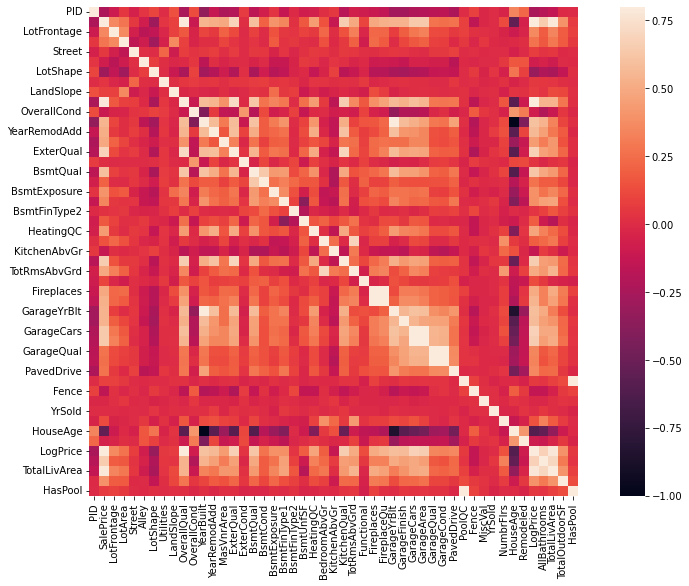

In [32]:
#correlation matrix
corr = housing.corr()
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, vmax=.8, square=True)

In [35]:
lm = LinearRegression()

target = housing.LogPrice
X = housing[[
    'TotalLivArea','TotalOutdoorSF','MasVnrArea','LotFrontage',
    'LotArea','GarageArea','BedroomAbvGr','TotRmsAbvGrd',
    'AllBathrooms','GarageCars','LotShape','YearBuilt',
    'YearRemodAdd','HouseAge','OverallQual','ExterQual','BsmtQual',
    'OverallCond','FireplaceQu','KitchenQual','SaleCondition',
    'Neighborhood','YrSold','CentralAir','Fireplaces',
    'MSSubClass','MSZoning'
]]
X

,TotalLivArea,TotalOutdoorSF,MasVnrArea,LotFrontage,LotArea,GarageArea,BedroomAbvGr,TotRmsAbvGrd,AllBathrooms,GarageCars,LotShape,YearBuilt,YearRemodAdd,HouseAge,OverallQual,ExterQual,BsmtQual,OverallCond,FireplaceQu,KitchenQual,SaleCondition,Neighborhood,YrSold,CentralAir,Fireplaces,MSSubClass,MSZoning
0,1094,166,0,60,7890,399,2,4,2.0,2,4,1939,1950,71,6,3,3,6,4,3,Normal,Southwest of ISU,2010,Y,1,1-STORY 1945 & OLDER,RL
1,1994,105,149,42,4235,266,2,5,3.0,1,4,1984,1984,26,5,4,4,5,0,4,Normal,Edwards,2009,Y,0,1-STORY PUD 1946 & NEWER,RL
2,1738,282,0,60,6060,216,2,5,1.0,1,4,1930,2007,80,5,4,3,9,0,4,Normal,"Iowa DOT,Rail Road",2007,Y,0,1-STORY 1945 & OLDER,C (all)
3,1039,279,0,80,8146,281,2,6,1.0,1,4,1900,2003,110,4,4,2,8,0,3,Normal,Old Town,2009,Y,0,2-STORY 1945 & OLDER,RL
4,2308,45,0,70,8400,528,3,6,3.5,2,4,2001,2001,9,8,4,4,6,0,4,Normal,Northwest Ames,2009,Y,0,2-STORY 1946 & NEWER,RL
5,1922,177,500,64,7301,672,4,7,3.0,2,4,2003,2003,7,7,4,0,5,5,4,Normal,Edwards,2009,Y,1,SPLIT FOYER,RL
6,936,144,0,60,6000,576,2,4,1.0,2,4,1953,1953,57,4,2,2,4,0,3,Normal,Old Town,2009,N,0,1-STORY 1946 & NEWER ALL STYLES,RM
7,1246,124,20,53,3710,428,2,5,2.0,2,4,2007,2008,3,7,4,4,5,4,4,Partial,Bloomington Heights,2008,Y,1,1-STORY 1946 & NEWER ALL STYLES,RL
8,1536,0,0,74,12395,484,3,6,1.0,2,4,1984,1984,26,5,3,3,6,0,3,Normal,Mitchell,2008,Y,0,1-STORY 1946 & NEWER ALL STYLES,RL
9,1539,44,76,35,3675,525,2,5,2.0,2,4,2005,2005,5,6,3,4,5,0,4,Normal,Edwards,2007,Y,0,PUD MULTILEVEL - INCL SPLIT LEV/FOYER,RM


In [37]:
feats_to_encode = X.columns[X.dtypes==object].tolist()
feats_to_encode

['SaleCondition', 'Neighborhood', 'CentralAir', 'MSSubClass', 'MSZoning']

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
pd.options.display.max_columns = None
pd.set_option("display.max_rows", None, "display.max_columns", None)
#label encoding
labelencoder = LabelEncoder()

for i in feats_to_encode:
    X[i+"_Encoded"] = labelencoder.fit_transform(X[i])

X.drop(feats_to_encode,axis=1,inplace=True)
X.head()

/var/folders/y9/fzcglvx51gb_4cpw72hcn17m0000gp/T/ipykernel_72412/3092955372.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i+"_Encoded"] = labelencoder.fit_transform(X[i])
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,TotalLivArea,TotalOutdoorSF,MasVnrArea,LotFrontage,LotArea,GarageArea,BedroomAbvGr,TotRmsAbvGrd,AllBathrooms,GarageCars,LotShape,YearBuilt,YearRemodAdd,HouseAge,OverallQual,ExterQual,BsmtQual,OverallCond,FireplaceQu,KitchenQual,YrSold,Fireplaces,SaleCondition_Encoded,Neighborhood_Encoded,CentralAir_Encoded,MSSubClass_Encoded,MSZoning_Encoded
0,1094,166,0,60,7890,399,2,4,2.0,2,4,1939,1950,71,6,3,3,6,4,3,2010,1,3,24,1,3,5
1,1994,105,149,42,4235,266,2,5,3.0,1,4,1984,1984,26,5,4,4,5,0,4,2009,0,3,7,1,5,5
2,1738,282,0,60,6060,216,2,5,1.0,1,4,1930,2007,80,5,4,3,9,0,4,2007,0,3,11,1,3,1
3,1039,279,0,80,8146,281,2,6,1.0,1,4,1900,2003,110,4,4,2,8,0,3,2009,0,3,20,1,9,5
4,2308,45,0,70,8400,528,3,6,3.5,2,4,2001,2001,9,8,4,4,6,0,4,2009,0,3,19,1,10,5


In [39]:
# NOTE: The VIFs in the R car package also give VIF by the degrees of freedom of the feature which is useful for
# dummified features with lots of categories
X_add_const = add_constant(X) # apparently, this is required for statsmodels
vif = pd.DataFrame()
vif['features'] = X_add_const.columns
vif['VIF'] = [variance_inflation_factor(X_add_const.values, i) for i in range(X_add_const.shape[1])]
vif


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,const,0.000000
1,TotalLivArea,3.487552
2,TotalOutdoorSF,1.274742
3,MasVnrArea,1.336125
4,LotFrontage,1.382349
5,LotArea,1.328658
6,GarageArea,5.273255
7,BedroomAbvGr,2.289429
8,TotRmsAbvGrd,3.195764
9,AllBathrooms,2.930870


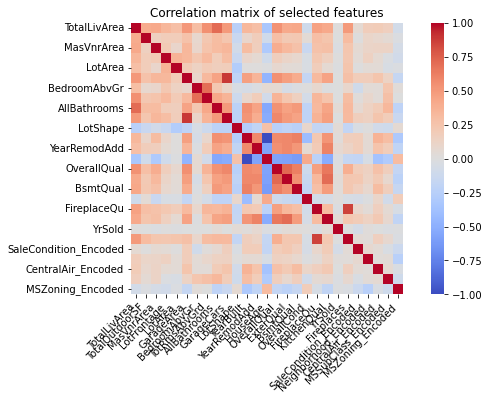

In [40]:
heatmap = sns.heatmap(X.corr(), cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected features')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [41]:
# Create training set and holdout
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)


In [42]:
# Fit model
lm.fit(X=X_train, y=y_train)
y_predict_train = lm.predict(X_train)
y_predict_test = lm.predict(X_test)

In [43]:
# Scale to compare coefficients via OLS
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Fit same model using statsmodels to see statistics
ols = sm.OLS(y_train, sm.add_constant(X_train_scaled))
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:               LogPrice   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     727.0
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:52:42   Log-Likelihood:                 1386.5
No. Observations:                1761   AIC:                            -2719.
Df Residuals:                    1734   BIC:                            -2571.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0200      0.003   4545.810      0.0

In [45]:
# See more statsmodels statistics
def results_summary_to_dataframe(results):
    '''Take the result of an statsmodel results table and transforms it into a dataframe'''
    feature_names = ['const'] + X.columns.tolist()
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({
        "feature": feature_names,
        "pvals": pvals,
        "coeff": coeff,
        "conf_lower": conf_lower,
        "conf_higher": conf_higher
    })

    # Reorder
    results_df = results_df[["feature", "coeff","pvals","conf_lower","conf_higher"]]
    return results_df

print(f"AIC {round(ans.aic, 5)}")
print(f"BIC {round(ans.bic, 5)}")

results_summary_to_dataframe(ans)

AIC -2719.06576
BIC -2571.27756


,feature,coeff,pvals,conf_lower,conf_higher
const,const,12.020026,0.000000e+00,12.014840,12.025212
x1,TotalLivArea,0.101943,5.795857e-83,0.092134,0.111753
x2,TotalOutdoorSF,0.012412,3.028318e-05,0.006591,0.018232
x3,MasVnrArea,0.005142,9.222380e-02,-0.000844,0.011127
x4,LotFrontage,0.022390,9.076188e-13,0.016289,0.028491
x5,LotArea,0.020827,1.100651e-11,0.014854,0.026800
x6,GarageArea,0.020801,7.493770e-04,0.008720,0.032883
x7,BedroomAbvGr,0.001704,6.725610e-01,-0.006204,0.009613
x8,TotRmsAbvGrd,0.041521,9.318788e-18,0.032134,0.050908
x9,AllBathrooms,0.012860,4.796632e-03,0.003929,0.021792


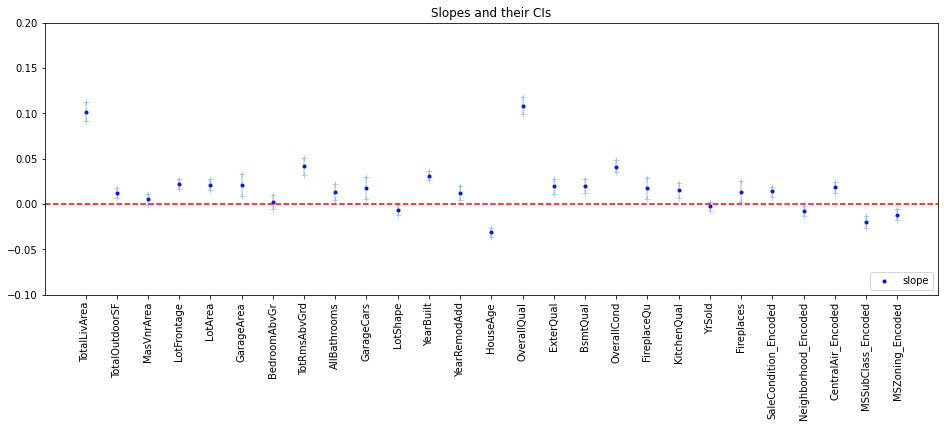

In [47]:
def plot_slope_CIs(df):
    plt.rcParams['figure.figsize'] = (10, 5)
    y_min, y_max = -0.1, 0.2

    table = pd.DataFrame(ans.summary().tables[1].data[1:])
    table.columns = ['name', 'coef', 'std err', 't value', 'p value', '2.5% confidence', '97.5% confidence']
    table = table.astype(
        {'name': str, 'coef': float, 'std err': float, 't value': float, 'p value': float, '2.5% confidence': float,
         '97.5% confidence': float})

    slope_table = table[['name', 'coef', '2.5% confidence', '97.5% confidence']].iloc[1:]
    slope_table.name = X.columns
    slope_table['y_min'] = slope_table['2.5% confidence'].map(lambda t: (t - y_min) / (y_max - y_min))
    slope_table['y_max'] = slope_table['97.5% confidence'].map(lambda t: (t - y_min) / (y_max - y_min))

    x = range(1, 1+len(X.columns))

    # Plot
    plt.figure(figsize=(16,5))
    plt.scatter(x=x, y=slope_table['coef'], label='slope', c='blue', marker='.')
    plt.axhline(0, linestyle='--', c='red')

    for i in x:
        plt.axvline(i, ymin=slope_table['y_min'][i], ymax=slope_table['y_max'][i], marker='+', alpha=0.3)
    plt.xticks(x, slope_table.name, rotation='vertical')
    plt.ylim((y_min, y_max))
    plt.title('Slopes and their CIs')
    plt.legend(loc=4)
    plt.show()

plot_slope_CIs(X)

In [48]:
# Score model
print(f"Coefficient of Determination training set: {round(lm.score(X=X_train, y=y_train), 5)}")
print(f"Coefficient of Determination holdout set:  {round(lm.score(X=X_test, y=y_test), 5)}")
print(f"MSE:                                       {round(mean_squared_error(y_true=y_test, y_pred=y_predict_test), 5)}")

Coefficient of Determination training set: 0.91597
Coefficient of Determination holdout set:  0.90327
MSE:                                       0.0137


In [53]:
# Beta coefficients and their effect
beta_names = np.insert(lm.feature_names, 0, "__Intercept__")

log_coefficients = np.insert(lm.coef_, 0, lm.intercept_)
unlogged_coefficients = np.insert(np.exp(lm.coef_), 0, np.exp(lm.intercept_))
effect = [(coeff-1) * housing.SalePrice.mean() for coeff in unlogged_coefficients]
effect[0] = 0

coeff_array = np.vstack([beta_names, log_coefficients, unlogged_coefficients, effect]).T
pd.DataFrame(coeff_array, columns=['Features', 'Coefficients (log)', 'Coefficients', 'Effect of 1-unit Change'])

AttributeError: 'LinearRegression' object has no attribute 'feature_names'

In [54]:
# Residuals
model_residuals_test = y_test - y_predict_test
model_residuals_test.describe()

count    755.000000
mean       0.004556
std        0.117044
min       -0.504169
25%       -0.059018
50%        0.007508
75%        0.074052
max        0.542045
Name: LogPrice, dtype: float64

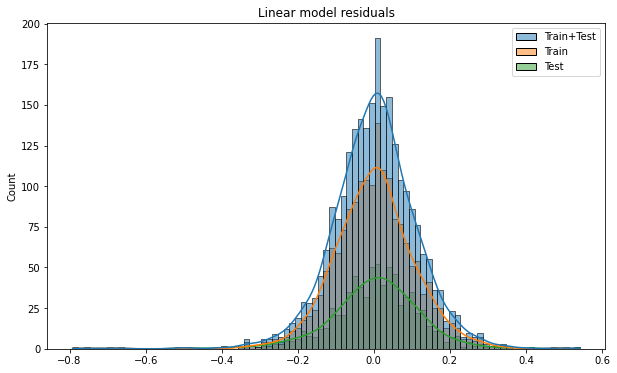

In [55]:
# Plot residuals
residuals_all = housing.LogPrice - lm.predict(X)
residuals_train = y_train - lm.predict(X_train)
residuals_test = y_test - lm.predict(X_test)
residuals = pd.DataFrame({"Train+Test": residuals_all, "Train": residuals_train, "Test": residuals_test})

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(residuals, kde=True, ax=ax)
plt.title("Linear model residuals")
plt.show()

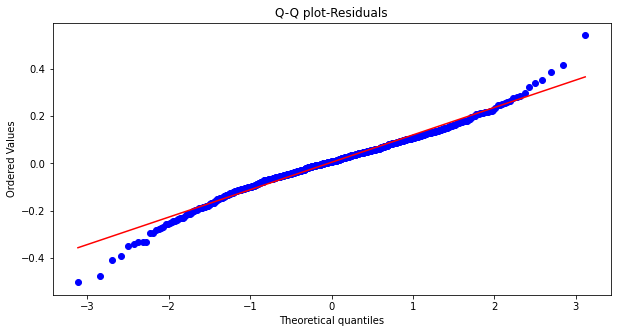

In [56]:
# Quantile-Quantile plot
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Q-Q plot-Residuals")
plt.show()

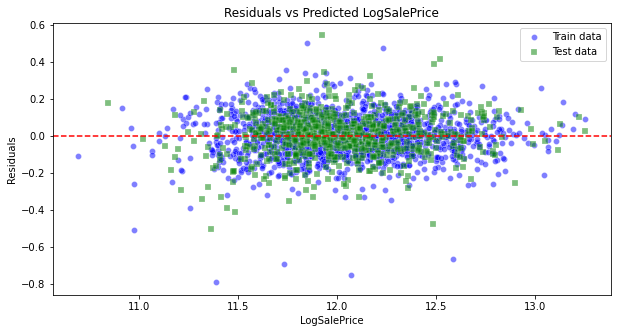

In [57]:
# Residuals vs Predicted LogSalePrice
sns.scatterplot(y=residuals_train, x=y_predict_train, color='blue', marker='o', alpha = 0.5, label="Train data")
sns.scatterplot(y=residuals_test, x=y_predict_test, color='green', marker='s', alpha=0.5, label="Test data")
plt.axhline(y=0, color="red", linestyle='--')
plt.title("Residuals vs Predicted LogSalePrice")
plt.ylabel("Residuals")
plt.xlabel("LogSalePrice")
plt.show()